Example to show how query and document matching show high matching semantic similarity score

/Users/zeeali/miniconda3/envs/myenv/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/Users/zeeali/miniconda3/envs/myenv/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


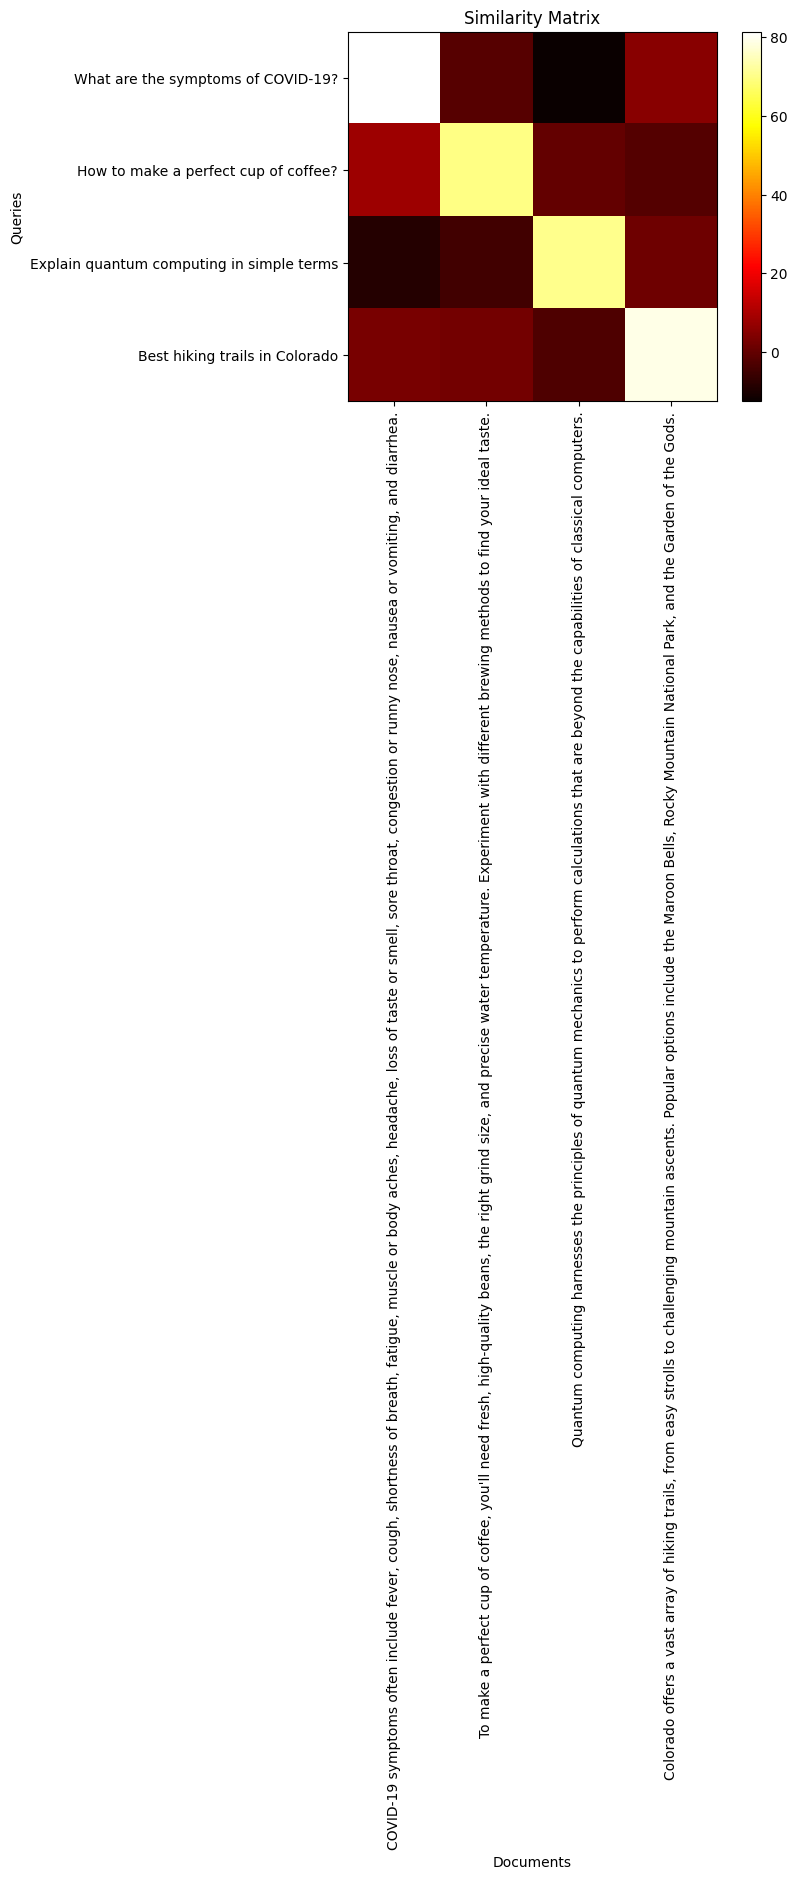

[[81.41412353515625, -1.68800687789917, -12.581892013549805, 5.095655918121338], [8.028806686401367, 69.95862579345703, 0.05951728671789169, -1.9413341283798218], [-8.675507545471191, -4.5380778312683105, 70.65826416015625, 1.3930026292800903], [3.1019630432128906, 2.311039447784424, -2.9363279342651367, 79.1673355102539]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Model loading and configuration
model = SentenceTransformer("all-MiniLM-L6-v2")
model.max_seq_length = 8192

# More diverse queries and documents
queries = [
    "What are the symptoms of COVID-19?",
    "How to make a perfect cup of coffee?",
    "Explain quantum computing in simple terms",
    "Best hiking trails in Colorado"
]
documents = [
    "COVID-19 symptoms often include fever, cough, shortness of breath, fatigue, muscle or body aches, headache, loss of taste or smell, sore throat, congestion or runny nose, nausea or vomiting, and diarrhea.",
    "To make a perfect cup of coffee, you'll need fresh, high-quality beans, the right grind size, and precise water temperature. Experiment with different brewing methods to find your ideal taste.",
    "Quantum computing harnesses the principles of quantum mechanics to perform calculations that are beyond the capabilities of classical computers.",
    "Colorado offers a vast array of hiking trails, from easy strolls to challenging mountain ascents. Popular options include the Maroon Bells, Rocky Mountain National Park, and the Garden of the Gods."
]

# Embedding creation
query_embeddings = model.encode(queries)
document_embeddings = model.encode(documents)

# Similarity calculation
scores = (query_embeddings @ document_embeddings.T) * 100

# Visualization
def plot_similarity_matrix(scores):
    plt.imshow(scores, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(documents)), documents, rotation=90)
    plt.yticks(range(len(queries)), queries)
    plt.xlabel('Documents')
    plt.ylabel('Queries')
    plt.title('Similarity Matrix')
    plt.show()

plot_similarity_matrix(scores)
print(scores.tolist())


[[81.41412353515625, -1.68800687789917, -12.581892013549805, 5.095655918121338], [8.028806686401367, 69.95862579345703, 0.05951728671789169, -1.9413341283798218], [-8.675507545471191, -4.5380778312683105, 70.65826416015625, 1.3930026292800903], [3.1019630432128906, 2.311039447784424, -2.9363279342651367, 79.1673355102539]]


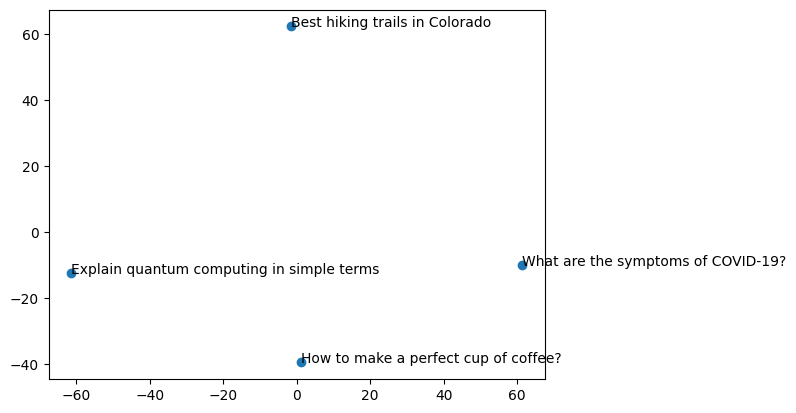

In [2]:
import pandas as pd

# Embedding creation
query_embeddings = model.encode(queries)
document_embeddings = model.encode(documents)

# Similarity calculation
scores = (query_embeddings @ document_embeddings.T) * 100

print(scores.tolist())

# Create a DataFrame for easier manipulation
data = pd.DataFrame(scores, columns=documents, index=queries)

# 1. Scatter Plot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
for i, label in enumerate(data.index):
    plt.annotate(label, (reduced_data[i, 0], reduced_data[i, 1]))
plt.show()


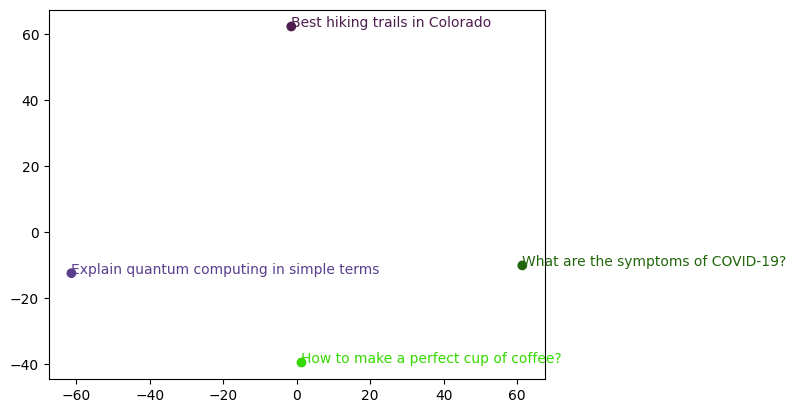

In [4]:
import random

def color_code_visualizations(data, scores):
    # Identify best-matching document for each query
    best_matches = data.idxmax(axis=1)

    # Create a color palette
    num_queries = len(data.index)
    colors = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_queries)]

    # Assign colors to queries and best-matching documents
    color_map = {}
    for i, query in enumerate(data.index):
        color_map[query] = colors[i]
        color_map[best_matches[query]] = colors[i]

    # Update visualizations with colors
    # ... (modify existing visualization code to use color_map)

    # Example for scatter plot:
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=[color_map[label] for label in data.index])
    for i, label in enumerate(data.index):
        plt.annotate(label, (reduced_data[i, 0], reduced_data[i, 1]), color=color_map[label])
    plt.show()

color_code_visualizations(data, scores)

In [5]:
print(scores.tolist())

[[81.41412353515625, -1.68800687789917, -12.581892013549805, 5.095655918121338], [8.028806686401367, 69.95862579345703, 0.05951728671789169, -1.9413341283798218], [-8.675507545471191, -4.5380778312683105, 70.65826416015625, 1.3930026292800903], [3.1019630432128906, 2.311039447784424, -2.9363279342651367, 79.1673355102539]]
